# Importação de Bibliotecas

In [13]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Lendo arquivo

In [14]:
df = pd.read_csv('./data/Psycological-Effects-of-COVID.csv')

# Tratamento de Dados

In [15]:
df.shape

(1175, 22)

O dataframe a ser analisado possui 1.175 linhas e 22 colunas.

In [16]:
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [17]:
df.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw', 'Unnamed: 19', 'time_bp.1',
       'travel+work'],
      dtype='object')

Renomeamos as colunas para melhor entendimento e excluimos as últimas três, das quais duas não tem valor algum e a outra não é específicada.

In [18]:
df.columns = ['Idade (anos)', 'Gênero', 'Ocupação', 'Linha de Trabalho','Tempo gasto no trabalho antes da pandemia','Tempo gasto no trabalho na pandemia','Tempo de Jornada de Trabalho','Avaliação de Facilidade com Internet', 'Gosta do ambiente doméstico','Avaliação de melhora de produtividade', 'Avaliação do Ciclo do Sono', 'Ganho de Nova habilidade', 'Avaliação Conexão familiar', 'Avaliação de Relaxamento', 'Tempo ganho para cuidar de si', 'Gosta de home office', 'Não gosta de home office', 'Prefere trabalhar em casa/trabalho', 'Gosta de trabalhar em alguns dias específicos em casa','custom1', 'custom2', 'custom3']

In [19]:
df['custom2'].unique()

array([ 7,  5,  9, 11,  4, 12], dtype=int64)

In [20]:
df = df.drop(columns=['custom1','custom2','custom3'])

In [21]:
df.isnull().sum()

Idade (anos)                                               0
Gênero                                                     0
Ocupação                                                   0
Linha de Trabalho                                        696
Tempo gasto no trabalho antes da pandemia                  0
Tempo gasto no trabalho na pandemia                        0
Tempo de Jornada de Trabalho                               0
Avaliação de Facilidade com Internet                       0
Gosta do ambiente doméstico                                0
Avaliação de melhora de produtividade                      0
Avaliação do Ciclo do Sono                                 0
Ganho de Nova habilidade                                   0
Avaliação Conexão familiar                                 0
Avaliação de Relaxamento                                   0
Tempo ganho para cuidar de si                              0
Gosta de home office                                       0
Não gosta de home office

In [22]:
df['Gênero'].map({"Female": "Mulher", "Male": "Homem"})

0        Homem
1        Homem
2        Homem
3        Homem
4       Mulher
         ...  
1170    Mulher
1171    Mulher
1172     Homem
1173     Homem
1174     Homem
Name: Gênero, Length: 1175, dtype: object

In [23]:
df['Ocupação'].unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

In [24]:
df['Ocupação'].map({"Student in College": "Universitários", "Student in School": "Estudantes de escolas", "Working Professional": "Profissionais", "Entrepreneur": "Empreendedores", "Retired/Senior Citizen": "Aposentados/Idosos", "Homemaker": "Dono/Dona de Casa", "Currently Out of Work": "Atualmente Sem Trabalho", "Medical Professional aiding efforts against COVID-19": "Médicos auxiliando ao combate contra COVID-19"})

0              Universitários
1       Estudantes de escolas
2              Universitários
3              Universitários
4              Universitários
                ...          
1170           Empreendedores
1171        Dono/Dona de Casa
1172            Profissionais
1173            Profissionais
1174            Profissionais
Name: Ocupação, Length: 1175, dtype: object

In [25]:
df['Linha de Trabalho'].unique()

array([nan, 'Teaching', 'Engineering', 'Management', 'APSPDCL ',
       'Architecture', 'Architect', 'Other', 'Government Employee'],
      dtype=object)

In [26]:
df['Linha de Trabalho'].map({"Teaching": "Ensino", "Engineering": "Engenharia", "Management": "Administração", "Architecture": "Arquitetura","Architect": "Arquitetura", "Other": "Outros", "Government Employee": "Funcionário Público"})

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1170           NaN
1171           NaN
1172    Engenharia
1173    Engenharia
1174    Engenharia
Name: Linha de Trabalho, Length: 1175, dtype: object

In [27]:
NA_Trabalho = df['Linha de Trabalho'].isna().sum()
print(f' Existem {NA_Trabalho} de índividuos que não possuem a linha de trabalho identificadas.')

 Existem 696 de índividuos que não possuem a linha de trabalho identificadas.


In [28]:
df['Tempo gasto no trabalho antes da pandemia']

0        7
1        7
2        7
3        7
4        7
        ..
1170     9
1171     5
1172     9
1173    11
1174     5
Name: Tempo gasto no trabalho antes da pandemia, Length: 1175, dtype: int64

In [29]:
df['Avaliação de Facilidade com Internet'].map({1: "Sem dificuldade", 2: "Pouca dificuldade", 3: "Dificuldade moderada", 4: "Alguma dificuldade",5: "Muita dificuldade"})

0       Dificuldade moderada
1         Alguma dificuldade
2          Pouca dificuldade
3       Dificuldade moderada
4          Pouca dificuldade
                ...         
1170       Pouca dificuldade
1171    Dificuldade moderada
1172    Dificuldade moderada
1173       Pouca dificuldade
1174       Pouca dificuldade
Name: Avaliação de Facilidade com Internet, Length: 1175, dtype: object

In [30]:
df['Gosta do ambiente doméstico'].map({1: "Detesta", 2: "Não gosta", 3: "Indiferente", 4: "Gosta",5: "Gosta muito"})

0       Indiferente
1         Não gosta
2         Não gosta
3           Detesta
4         Não gosta
           ...     
1170        Detesta
1171    Gosta muito
1172      Não gosta
1173      Não gosta
1174      Não gosta
Name: Gosta do ambiente doméstico, Length: 1175, dtype: object

In [31]:
df['Avaliação de melhora de produtividade'].unique()

array([ 0. , -0.5,  1. , -1. ,  0.5])

In [32]:
df['Avaliação do Ciclo do Sono']

0       0.0
1       0.5
2       0.0
3       1.0
4       0.0
       ... 
1170   -0.5
1171   -1.0
1172    0.5
1173    0.0
1174   -0.5
Name: Avaliação do Ciclo do Sono, Length: 1175, dtype: float64

In [33]:
df.dtypes

Idade (anos)                                              object
Gênero                                                    object
Ocupação                                                  object
Linha de Trabalho                                         object
Tempo gasto no trabalho antes da pandemia                  int64
Tempo gasto no trabalho na pandemia                        int64
Tempo de Jornada de Trabalho                             float64
Avaliação de Facilidade com Internet                       int64
Gosta do ambiente doméstico                                int64
Avaliação de melhora de produtividade                    float64
Avaliação do Ciclo do Sono                               float64
Ganho de Nova habilidade                                 float64
Avaliação Conexão familiar                               float64
Avaliação de Relaxamento                                 float64
Tempo ganho para cuidar de si                            float64
Gosta de home office     

In [34]:
df['Prefere trabalhar em casa/trabalho']

0       Complete Physical Attendance
1       Complete Physical Attendance
2       Complete Physical Attendance
3       Complete Physical Attendance
4       Complete Physical Attendance
                    ...             
1170    Complete Physical Attendance
1171    Complete Physical Attendance
1172    Complete Physical Attendance
1173    Complete Physical Attendance
1174            Work/study from home
Name: Prefere trabalhar em casa/trabalho, Length: 1175, dtype: object

In [37]:
df['Gosta de trabalhar em alguns dias específicos em casa'].map({'Yes' : 'Sim', 'No' : 'Não', 'Maybe' : 'Talvez'})

0          Sim
1          Não
2          Sim
3          Sim
4          Sim
         ...  
1170       Sim
1171    Talvez
1172    Talvez
1173       Sim
1174       Sim
Name: Gosta de trabalhar em alguns dias específicos em casa, Length: 1175, dtype: object

# Matriz de Correlação

C:\Users\gabri\AppData\Local\Temp\ipykernel_2636\1768419423.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


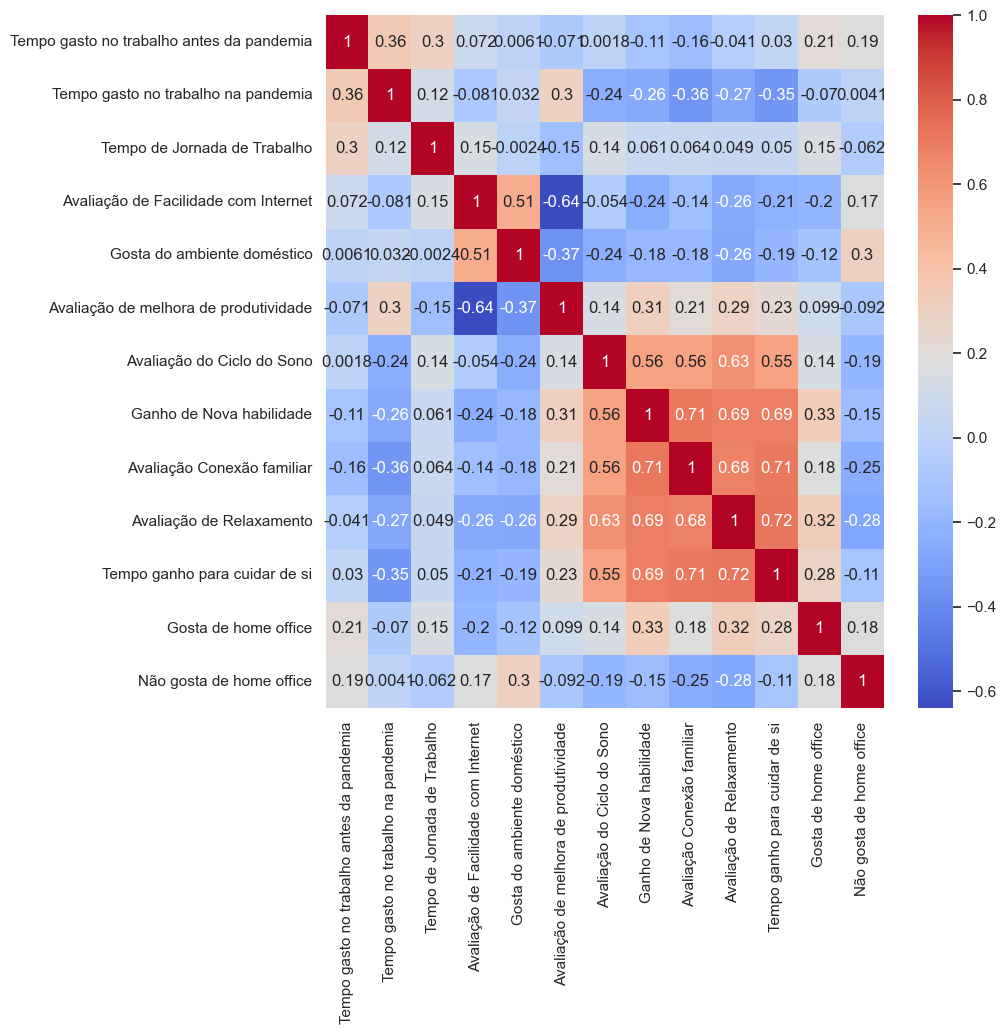

In [52]:
# Crie a matriz de correlação
corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm')

sns.set (rc = {'figure.figsize':(9, 9)})
# Exiba o gráfico


In [36]:
# tabelas prontas pra ML ['Avaliação do Ciclo do Sono'], ['Ganho de Nova habilidade'], 'Avaliação Conexão familiar', Avaliação de Relaxamento, Tempo ganho para cuidar de si
# Binário = 'Gosta de home office', 'Não gosta de home office',